<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

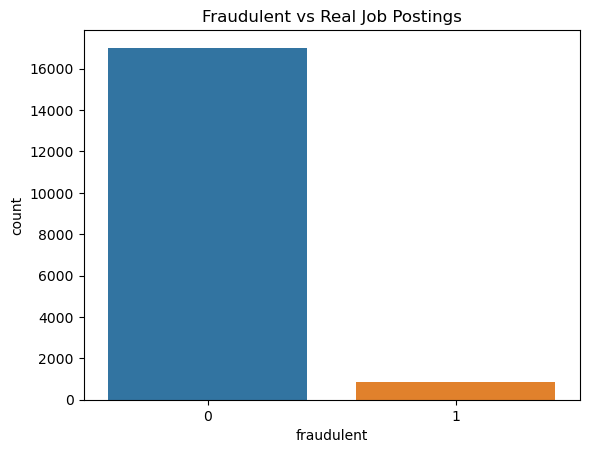

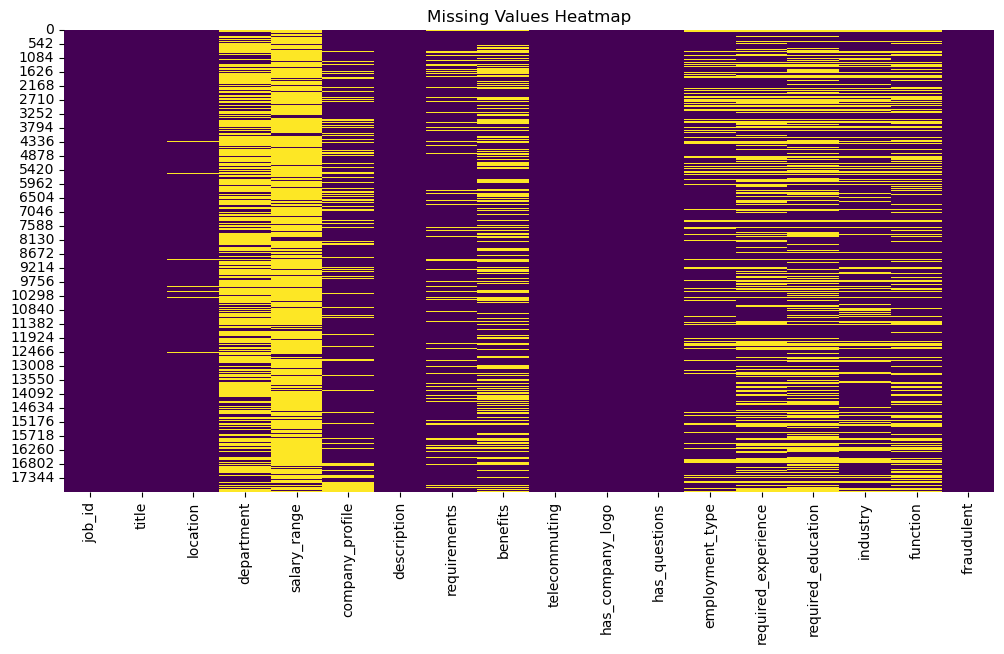


Top 10 titles:
title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64

Top 10 locations:
location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
US, TX, Houston          269
US, IL, Chicago          255
US, DC, Washington       251
DE, BE, Berlin           221
NZ, N, Auckland          218
Name: count, dtype: int64

Top 10 industrys:
industry


c:\Users\sadee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


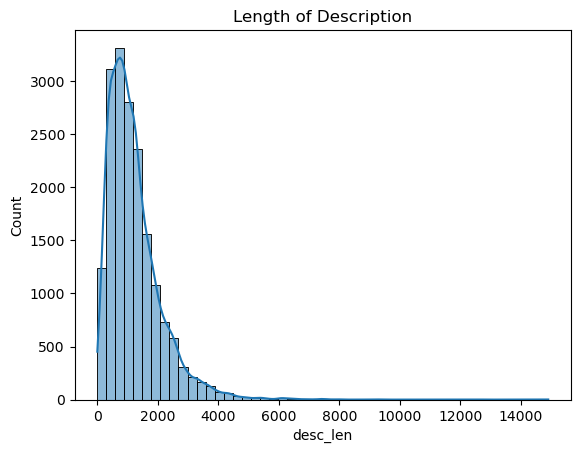

In [2]:
# A. LOAD AND EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fake_job_postings.csv")

# Basic Info
print(df.info())
print(df["fraudulent"].value_counts(normalize=True))

# Visual: Class Distribution
sns.countplot(data=df, x="fraudulent")
plt.title("Fraudulent vs Real Job Postings")
plt.show()

# Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Most common job titles / locations / industries
for col in ["title", "location", "industry"]:
    print(f"\nTop 10 {col}s:")
    print(df[col].value_counts().head(10))

# Length of description/requirements
df["desc_len"] = df["description"].fillna("").apply(len)
df["req_len"] = df["requirements"].fillna("").apply(len)

sns.histplot(df["desc_len"], bins=50, kde=True)
plt.title("Length of Description")
plt.show()


In [8]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 93.7 kB/s eta 0:26:41
   ---------------------------------------- 0.0/150.0 MB 93.7 kB/s eta 0:26:41
   ---------------------------------------- 0.0/150.0 MB 93.7 kB/s eta 0:26:41
   ---------------------------------------- 0.0/150.0 MB 93.7 kB/s eta 0:26:41
   ---------------------------------------- 0.1/150.0 MB 198.8 kB/s eta 0:12:34
   ---------------------------------

c:\Users\sadee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[3400    3]
 [  66  107]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.97      0.62      0.76       173

    accuracy                           0.98      3576
   macro avg       0.98      0.81      0.87      3576
weighted avg       0.98      0.98      0.98      3576


=== Random Forest ===
              precision    recall  f1-score   support

    Real (0)       0.98      1.00      0.99      3403
    Fake (1)       0.97      0.62      0.76       173

    accuracy                           0.98      3576
   macro avg       0.98      0.81      0.87      3576
weighted avg       0.98      0.98      0.98      3576



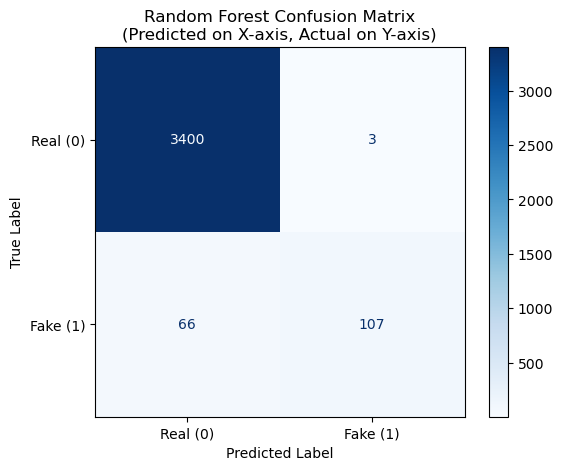


=== XGBoost ===
              precision    recall  f1-score   support

    Real (0)       0.99      0.99      0.99      3403
    Fake (1)       0.75      0.77      0.76       173

    accuracy                           0.98      3576
   macro avg       0.87      0.88      0.88      3576
weighted avg       0.98      0.98      0.98      3576



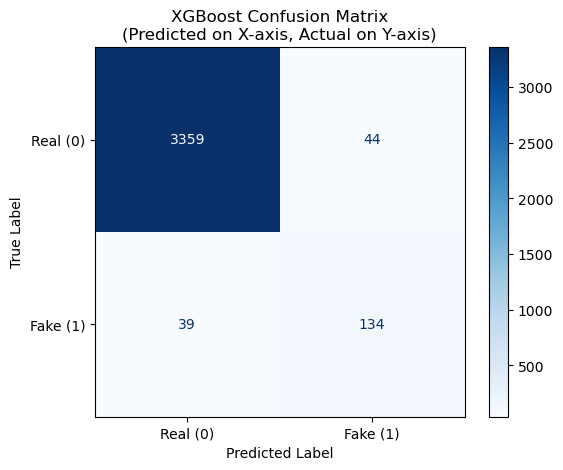


=== Logistic Regression ===
              precision    recall  f1-score   support

    Real (0)       0.99      0.98      0.99      3403
    Fake (1)       0.69      0.77      0.73       173

    accuracy                           0.97      3576
   macro avg       0.84      0.88      0.86      3576
weighted avg       0.97      0.97      0.97      3576



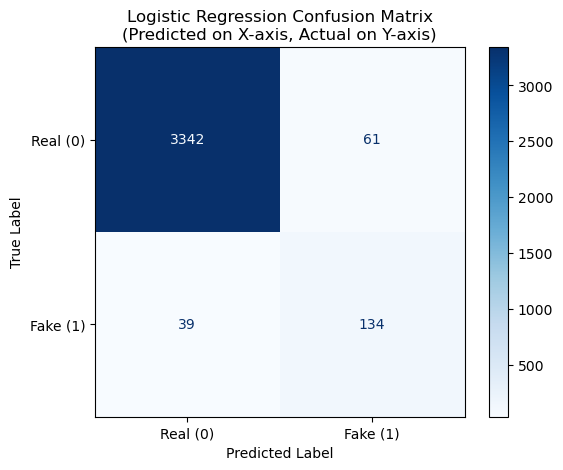

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Drop rows with missing target
df = df.dropna(subset=["fraudulent"])
df.fillna("", inplace=True)

# SELECT FEATURES
X = df[["title", "location", "industry", "description", "requirements"]]
y = df["fraudulent"]

# SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# COLUMNS
categorical = ["title", "location", "industry"]
textual = ["description", "requirements"]

# PIPELINES
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", max_categories=20))
])

text_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", max_features=3000))
])

# 1. Combine text columns
X_train["text_combined"] = X_train["description"] + " " + X_train["requirements"]
X_test["text_combined"] = X_test["description"] + " " + X_test["requirements"]

# 2. Define ColumnTransformer
preprocessor = ColumnTransformer([
    ("cat", cat_pipe, ["title", "location", "industry"]),
    ("txt", text_pipe, "text_combined")
])

# 3. Preprocess data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_processed, y_train)

# 5. Train ensemble model (Random Forest or XGBoost)
clf = RandomForestClassifier(n_estimators=200, class_weight=None, random_state=42)
clf.fit(X_resampled, y_resampled)

# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_resampled, y_resampled)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)

# 6. Predict and evaluate
y_pred = clf.predict(X_test_processed)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

models = {
    "Random Forest": clf,
    "XGBoost": xgb,
    "Logistic Regression": lr
}

for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=["Real (0)", "Fake (1)"]))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real (0)", "Fake (1)"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix\n(Predicted on X-axis, Actual on Y-axis)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [15]:
X_test.describe()

,title,location,industry,description,requirements,text_combined
count,3576,3576,3576,3576,3576,3576
unique,2777,1177,117,3278,2646,3316
top,English Teacher Abroad,"GB, LND, London",,"Play with kids, get paid for it Love travel? J...",,"Play with kids, get paid for it Love travel? J..."
freq,49,139,977,71,564,71


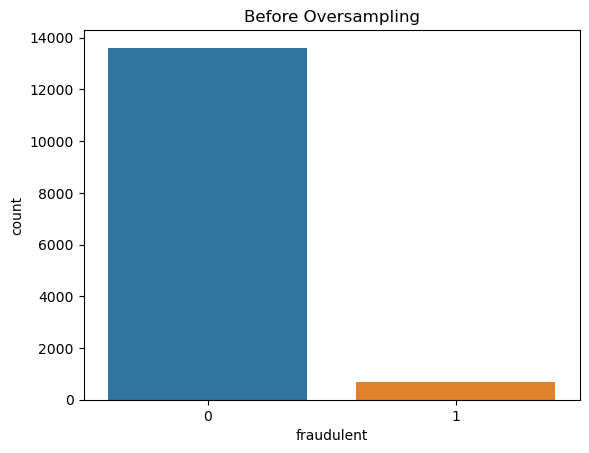

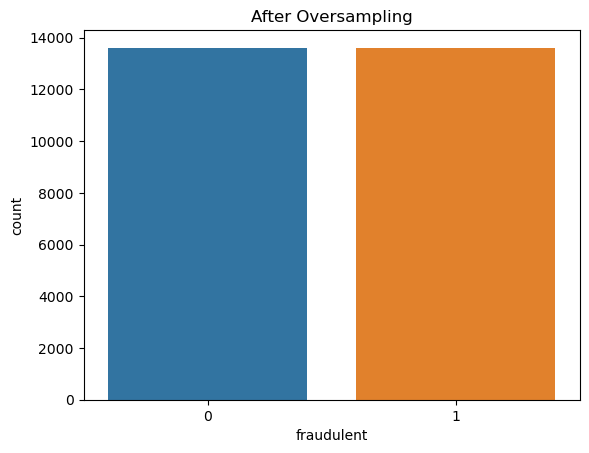

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.title("Before Oversampling")
plt.show()

sns.countplot(x=y_resampled)
plt.title("After Oversampling")
plt.show()


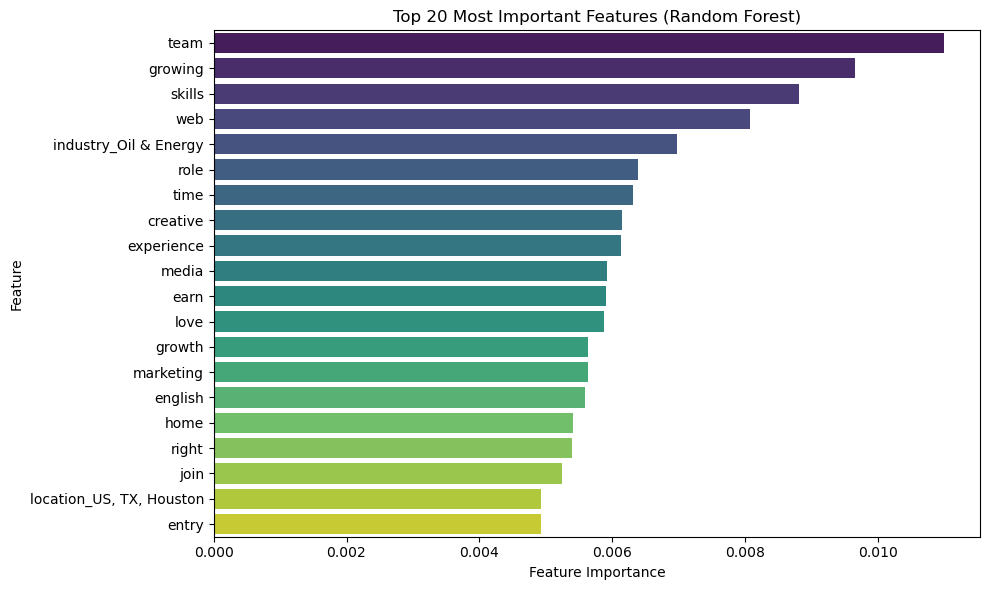

In [19]:
# 1. Get feature names from preprocessor (not clf)
ohe = preprocessor.transformers_[0][1].named_steps['ohe']
tfidf = preprocessor.transformers_[1][1].named_steps['tfidf']

# Get encoded feature names
ohe_features = ohe.get_feature_names_out(["title", "location", "industry"])
tfidf_features = tfidf.get_feature_names_out()

# 2. Combine all feature names
feature_names = np.concatenate([ohe_features, tfidf_features])

# 3. Get feature importances from Random Forest
importances = clf.feature_importances_

# 4. Create DataFrame
import pandas as pd
feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(20)

# 5. Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x="importance", y="feature", palette="viridis")
plt.title("Top 20 Most Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


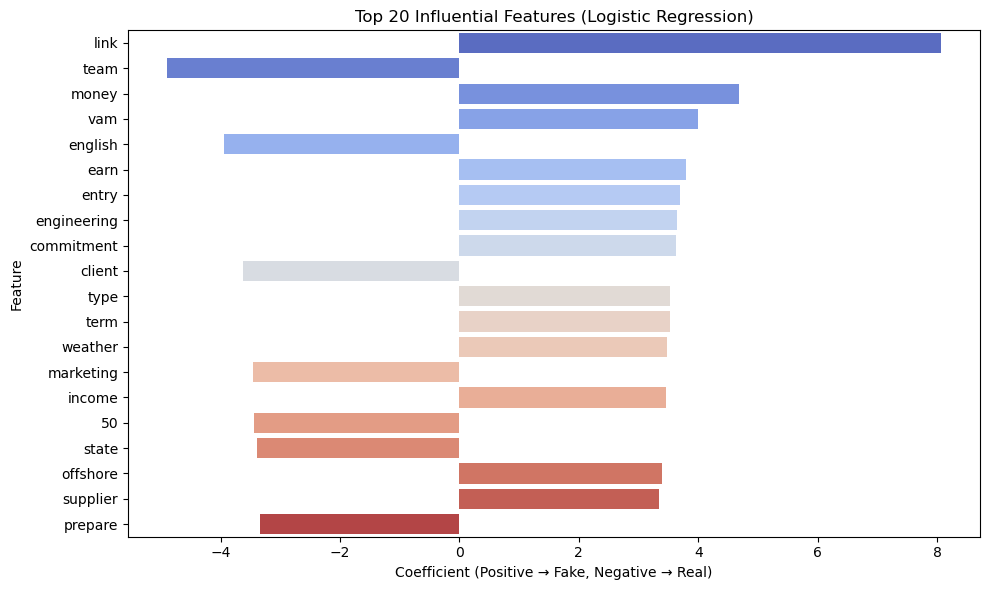

In [20]:
# 1. Get feature names from preprocessor
ohe = preprocessor.transformers_[0][1].named_steps['ohe']
tfidf = preprocessor.transformers_[1][1].named_steps['tfidf']

ohe_features = ohe.get_feature_names_out(["title", "location", "industry"])
tfidf_features = tfidf.get_feature_names_out()

feature_names = np.concatenate([ohe_features, tfidf_features])

# 2. Get coefficients from Logistic Regression
coefs = lr.coef_.flatten()

# 3. Create DataFrame
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
}).sort_values(by="coefficient", key=abs, ascending=False).head(20)

# 4. Plot
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="coefficient", y="feature", palette="coolwarm")
plt.title("Top 20 Influential Features (Logistic Regression)")
plt.xlabel("Coefficient (Positive → Fake, Negative → Real)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
